In [3]:
import xlrd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import OrderedDict
import itertools
from wordcloud import WordCloud 
import random
import itertools

In [4]:
tvdf = pd.read_csv('TV_shows_all_features.csv', converters = {'Timestamp':str})

In [2]:
def red_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    '''
    Plotting wordcloud font as red
    '''
    assert(isinstance(word,str))
    return "hsl(0, 100%%, %d%%)" % random.randint(30, 50)

def green_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    '''
    Plotting wordcloud font as green
    '''
    assert(isinstance(word,str))
    return "hsl(100, 100%%, %d%%)" % random.randint(20, 40)
def blue_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    '''
    Plotting wordcloud font as blue
    '''
    assert(isinstance(word,str))
    return "hsl(190, 100%%, %d%%)" % random.randint(40, 60)
def purple_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    '''
    Plotting wordcloud font as purple
    '''
    assert(isinstance(word,str))
    return "hsl(300, 47%%, %d%%)" % random.randint(60, 80)

In [11]:
def producers_wc(df,platform,func):
  '''
  wordcloud for producers for TV Shows on platforms
  input param: df: input dataframe
  input param: platform: one of the platform
  '''
  assert(isinstance(df,pd.DataFrame))
  assert(isinstance(platform,str))
  tvdf = df
  dictyr = {}
  directors = ''
  tvdf = tvdf.dropna()
  for i in range(len(tvdf.index)):
      listdirectors = []
      if tvdf.iloc[i][platform] == True:
          directors = tvdf.iloc[i]['Producers']
          listdirectors = directors.split(',')
          for currdir in listdirectors:
              if currdir == '[]':
                continue
              currdir = currdir.replace("'","")
              currdir = currdir.replace("[","")
              currdir = currdir.replace("]","")
              try:
                  dictyr[currdir].append(tvdf.iloc[i]['Title'])
              except:
                  dictyr[currdir] = []
                  dictyr[currdir].append(tvdf.iloc[i]['Title'])
  dictyrnum = {}
  for keys,values in dictyr.items():
      dictyrnum[keys] = len(values)
  ordereddictyrnum = OrderedDict(sorted(dictyrnum.items(), key=lambda t: t[0]))
  labels = []
  data = []
  labelscnt = []
  for keys,values in ordereddictyrnum.items():
      labels.append(keys)
      data.append(values)
  for i in range(len(labels)):
      labelscnt.append(labels.index(labels[i]))
  d = dict(zip(labels, data))
  wordcloud = WordCloud(collocations=False,background_color='#f5e7b7',).generate_from_frequencies(d)
  plt.figure(figsize=(15,8))
  plt.imshow(wordcloud.recolor(color_func=func))
  plt.axis("off")
  plt.savefig("wordc-netflix-tv"+".png", bbox_inches='tight')
  plt.show()
  plt.close()

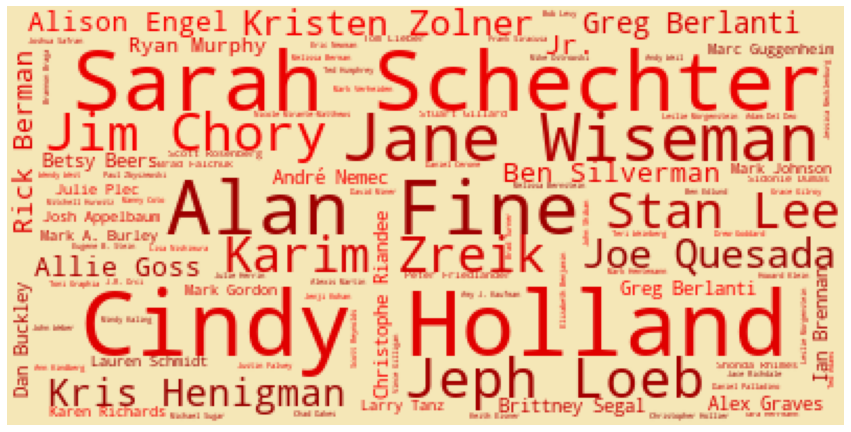

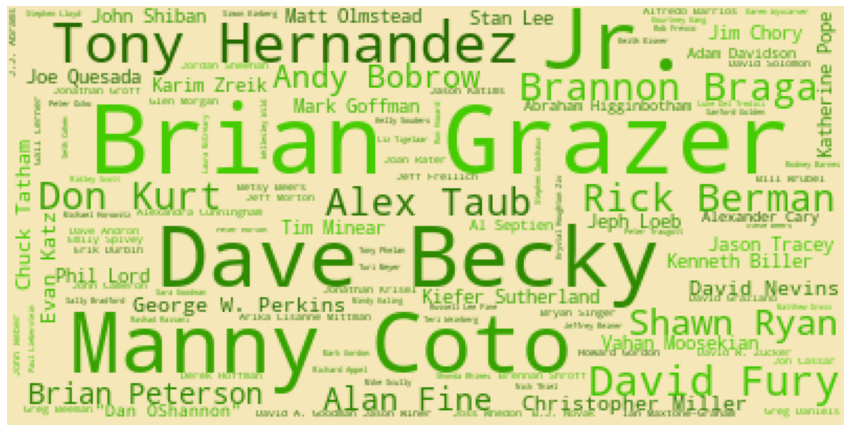

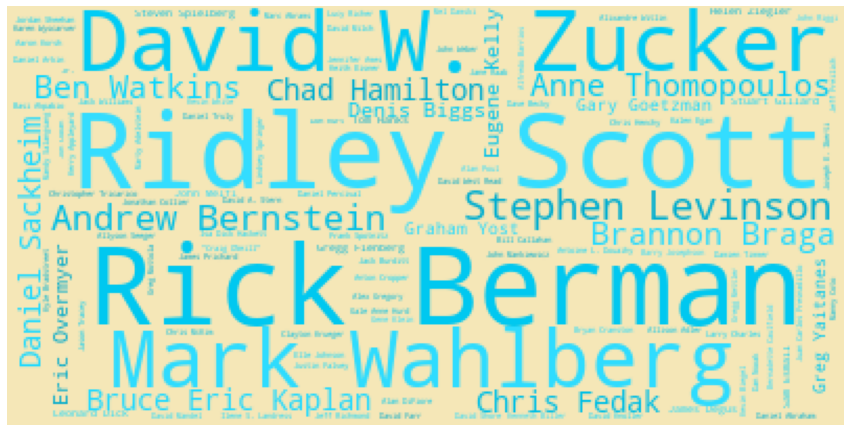

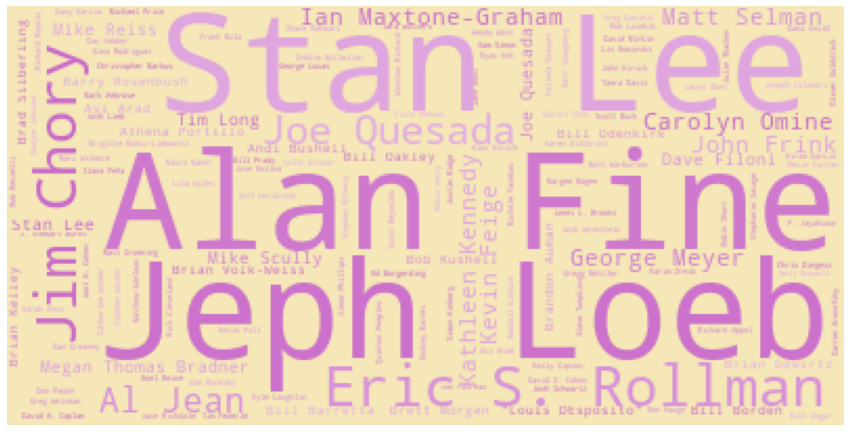

In [12]:
producers_wc(tvdf,'Netflix',red_func)
producers_wc(tvdf,'Hulu',green_func)
producers_wc(tvdf,'Prime Video',blue_func)
producers_wc(tvdf,'Disney+',purple_func)

In [16]:
def actors_wc(df,platform,func):
  '''
  wordcloud for actors for TV Shows on platforms
  input param: df: input dataframe
  input param: platform: one of the platform
  '''
  assert(isinstance(df,pd.DataFrame))
  assert(isinstance(platform,str))
  tvdf = df
  dictyr = {}
  directors = ''
  tvdf = tvdf.dropna()
  for i in range(len(tvdf.index)):
      listdirectors = []
      if tvdf.iloc[i][platform] == True:
          directors = tvdf.iloc[i]['Actors']
          listdirectors = directors.split(',')
          for currdir in listdirectors:
              if currdir == '[]':
                continue
              currdir = currdir.replace("'","")
              currdir = currdir.replace("[","")
              currdir = currdir.replace("]","")
              try:
                  dictyr[currdir].append(tvdf.iloc[i]['Title'])
              except:
                  dictyr[currdir] = []
                  dictyr[currdir].append(tvdf.iloc[i]['Title'])
  dictyrnum = {}
  for keys,values in dictyr.items():
      dictyrnum[keys] = len(values)
  ordereddictyrnum = OrderedDict(sorted(dictyrnum.items(), key=lambda t: t[0]))
  labels = []
  data = []
  labelscnt = []
  for keys,values in ordereddictyrnum.items():
      labels.append(keys)
      data.append(values)
  for i in range(len(labels)):
      labelscnt.append(labels.index(labels[i]))
  d = dict(zip(labels, data))
  wordcloud = WordCloud(collocations=False,background_color='#f5e7b7',).generate_from_frequencies(d)
  plt.figure(figsize=(15,8))
  plt.imshow(wordcloud.recolor(color_func=func))
  plt.axis("off")
  plt.savefig("wordc-netflix-tv-act"+".png", bbox_inches='tight')
  plt.show()
  plt.close()

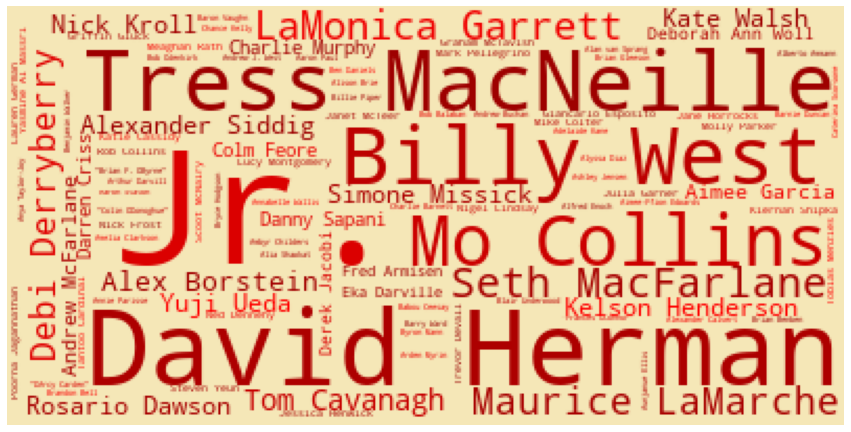

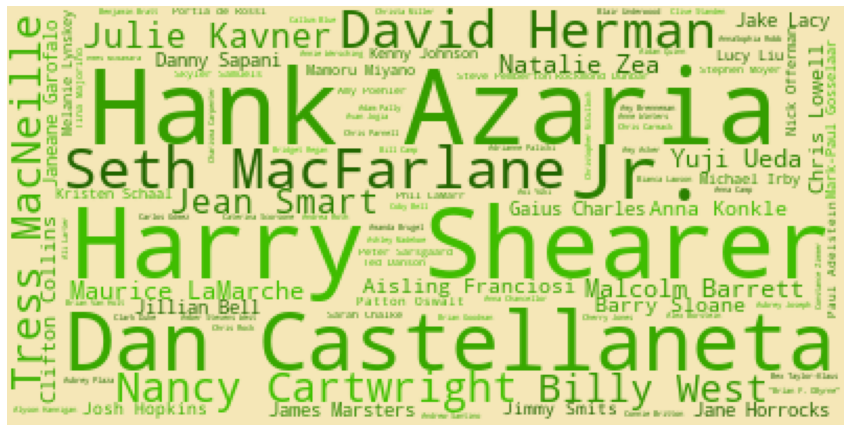

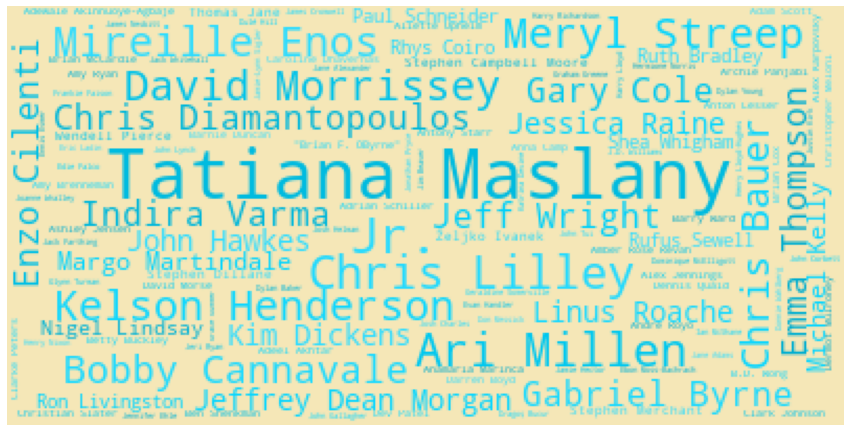

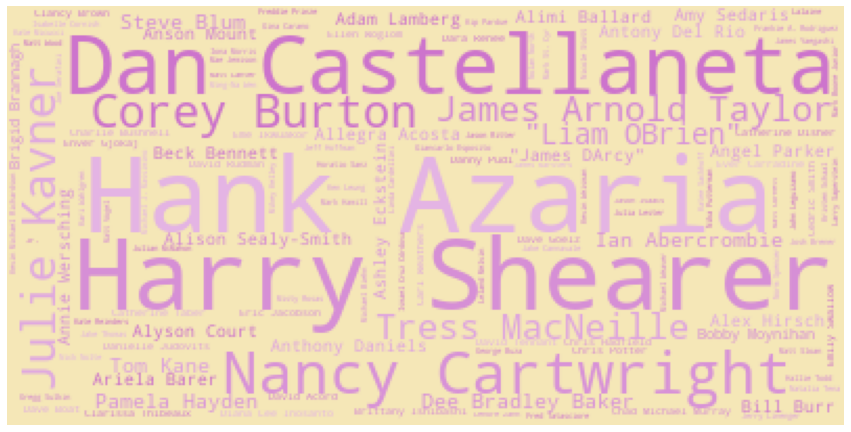

In [17]:
actors_wc(tvdf,'Netflix',red_func)
actors_wc(tvdf,'Hulu',green_func)
actors_wc(tvdf,'Prime Video',blue_func)
actors_wc(tvdf,'Disney+',purple_func)

In [27]:
colors = ["#546E3D", "#9AFF47", "#E39E63", "#760000", "#9B2700", "#D8EA65", "#9B6900", "#C28500", "#FF950E", "#FF5D1C", "#DFB28A", "#C86A3D", "#CED09F"]
def create_dict(df,platform):
    ''' 
    Creates a dictionary for year wise list of movies and the number of movies for each set of 10 years
    params input: df: input dataframe
    params input: platform: platform for which dictionary is to be created
    params output: returns a dictionary of number of movies for each set of 10 years
    '''
    assert(isinstance(df,pd.DataFrame))
    assert(isinstance(platform,str))
    tvdf = df
    dictyr = {}
    for i in range(len(tvdf.index)):
        if tvdf.iloc[i][platform] == True:
            try:
                dictyr[tvdf.iloc[i]['Year']].append(tvdf.iloc[i]['Title'])
            except:
                dictyr[tvdf.iloc[i]['Year']] = []
                dictyr[tvdf.iloc[i]['Year']].append(tvdf.iloc[i]['Title'])
    dictyrnum = {}
    for keys,values in dictyr.items():
        dictyrnum[keys] = len(values)
    ordereddictyrnum = OrderedDict(sorted(dictyrnum.items(), key=lambda t: t[0]))
    minyrn = list(ordereddictyrnum.keys())[0]
    z =  (minyrn - 1900)//10
    cnt = 1900 + z*10
    cntfil = 0
    dictyrchunksnum = {}
    for keys in ordereddictyrnum.keys():
        try:
            cntfil = (keys-cnt)//10
            dictyrchunksnum[cntfil] = dictyrchunksnum[cntfil] + ordereddictyrnum[keys]
        except:
            cntfil = (keys-cnt)//10
            dictyrchunksnum[cntfil] = 0
            dictyrchunksnum[cntfil] = dictyrchunksnum[cntfil] + ordereddictyrnum[keys]
    i = 1900 + z*10
    newdictyrchunksnumnetflix = {}
    for keys,values in dictyrchunksnum.items():
        newdictyrchunksnumnetflix[str(i)+'-'+str(i+9)] = values
        i = i+10
    return newdictyrchunksnumnetflix

In [28]:
newdictyrchunksnumnetflix = create_dict(tvdf,'Netflix')
newdictyrchunksnumhulu = create_dict(tvdf,'Hulu')
newdictyrchunksnumpv = create_dict(tvdf,'Prime Video')
newdictyrchunksnumdp = create_dict(tvdf,'Disney+')

In [29]:
for k,v in newdictyrchunksnumhulu.items():
    if k in newdictyrchunksnumnetflix.keys():
        continue
    else:
        newdictyrchunksnumnetflix[k] = 0
for k,v in newdictyrchunksnumhulu.items():
    if k in newdictyrchunksnumpv.keys():
        continue
    else:
        newdictyrchunksnumpv[k] = 0
for k,v in newdictyrchunksnumhulu.items():
    if k in newdictyrchunksnumdp.keys():
        continue
    else:
        newdictyrchunksnumdp[k] = 0

In [30]:
yrdict_tv = {}
for k,v in newdictyrchunksnumnetflix.items():
    try:
        yrdict_tv[k]
    except:
        yrdict_tv[k] = {}
    yrdict_tv[k]['Netflix'] = v
for k,v in newdictyrchunksnumhulu.items():
    try:
        yrdict_tv[k]
    except:
        yrdict_tv[k] = {}
    yrdict_tv[k]['Hulu'] = v
for k,v in newdictyrchunksnumpv.items():
    try:
        yrdict_tv[k]
    except:
        yrdict_tv[k] = {}
    yrdict_tv[k]['Prime Video'] = v

for k,v in newdictyrchunksnumdp.items():
    try:
        yrdict_tv[k]
    except:
        yrdict_tv[k] = {}
    yrdict_tv[k]['Disney+'] = v

In [32]:
yrdict = {}
for k,v in newdictyrchunksnumnetflix.items():
  try:
    yrdict[k]
  except:
    yrdict[k] = {}
  yrdict[k]['Netflix'] = v
for k,v in newdictyrchunksnumhulu.items():
  try:
    yrdict[k]
  except:
    yrdict[k] = {}
  yrdict[k]['Hulu'] = v

for k,v in newdictyrchunksnumpv.items():
  try:
    yrdict[k]
  except:
    yrdict[k] = {}
  yrdict[k]['Prime Video'] = v

for k,v in newdictyrchunksnumdp.items():
  try:
    yrdict[k]
  except:
    yrdict[k] = {}
  yrdict[k]['Disney+'] = v
print(yrdict)

{'1910-1919': {'Netflix': 1, 'Prime Video': 1}, '1920-1929': {'Netflix': 1, 'Prime Video': 6}, '1930-1939': {'Netflix': 5, 'Hulu': 2, 'Prime Video': 28, 'Disney+': 0}, '1940-1949': {'Netflix': 4, 'Hulu': 2, 'Prime Video': 33, 'Disney+': 0}, '1950-1959': {'Netflix': 18, 'Hulu': 8, 'Prime Video': 25, 'Disney+': 1}, '1960-1969': {'Netflix': 35, 'Hulu': 27, 'Prime Video': 66, 'Disney+': 1}, '1970-1979': {'Netflix': 181, 'Hulu': 23, 'Prime Video': 141, 'Disney+': 7}, '1980-1989': {'Netflix': 1576, 'Hulu': 48, 'Prime Video': 398, 'Disney+': 22}, '1990-1999': {'Netflix': 110, 'Hulu': 105, 'Prime Video': 1425, 'Disney+': 30}, '2000-2009': {'Netflix': 0, 'Hulu': 334, 'Prime Video': 18, 'Disney+': 111}, '2010-2019': {'Netflix': 0, 'Hulu': 1164, 'Prime Video': 0, 'Disney+': 8}, '2020-2029': {'Netflix': 0, 'Hulu': 41, 'Prime Video': 0, 'Disney+': 0}, '1900-1909': {'Prime Video': 3}}


In [33]:
colors = ["#546E3D", "#9AFF47", "#E39E63", "#760000", "#9B2700", "#D8EA65", "#9B6900", "#C28500", "#FF950E", "#FF5D1C", "#DFB28A", "#C86A3D", "#CED09F"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


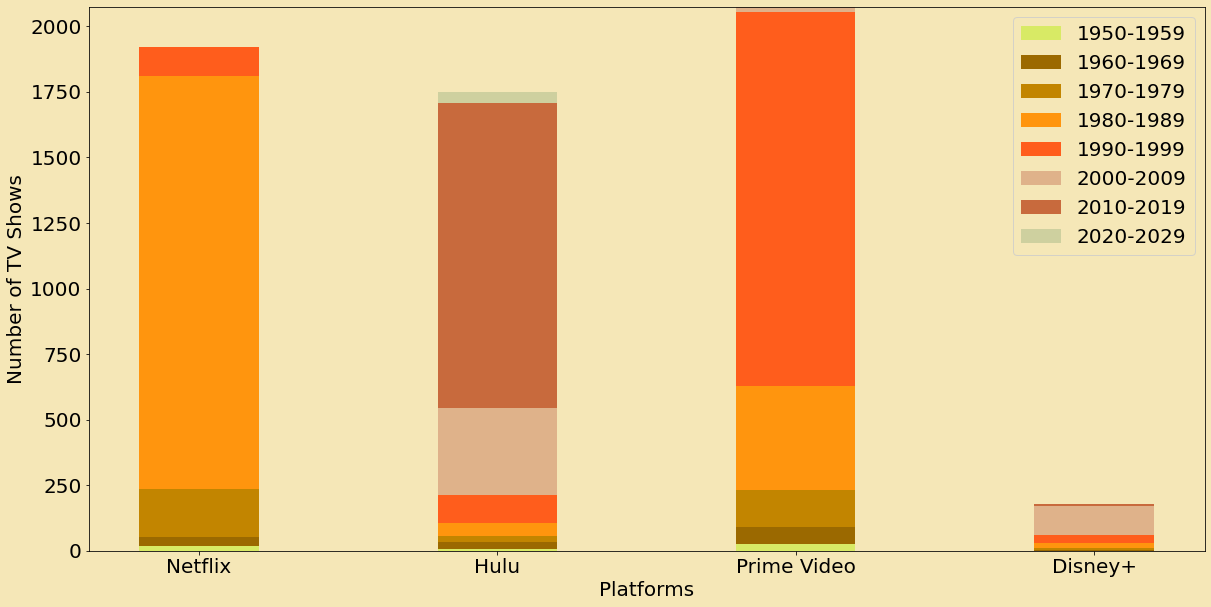

In [34]:
plt.figure(figsize=(20,10))
plt.set_cmap('autumn')
plt.bar(yrdict['1950-1959'].keys(), yrdict['1950-1959'].values(), width=0.4, align='center', label='1950-1959', color=colors[5])
plt.bar(yrdict['1960-1969'].keys(), yrdict['1960-1969'].values(), bottom=[yrdict['1950-1959'][i] for i in yrdict['1960-1969'].keys()], width=0.4, align='center', label='1960-1969', color = colors[6])
plt.bar(yrdict['1970-1979'].keys(), yrdict['1970-1979'].values(), bottom=[yrdict['1950-1959'][i]+yrdict['1960-1969'][i] for i in yrdict['1970-1979'].keys()], width=0.4, align='center', label='1970-1979', color = colors[7])
plt.bar(yrdict['1980-1989'].keys(), yrdict['1980-1989'].values(), bottom=[yrdict['1950-1959'][i]+yrdict['1960-1969'][i]+yrdict['1970-1979'][i] for i in yrdict['1980-1989'].keys()], width=0.4, align='center', label='1980-1989', color = colors[8])
plt.bar(yrdict['1990-1999'].keys(), yrdict['1990-1999'].values(), bottom=[yrdict['1950-1959'][i]+yrdict['1960-1969'][i]+yrdict['1970-1979'][i]+yrdict['1980-1989'][i] for i in yrdict['1990-1999'].keys()], width=0.4, align='center', label='1990-1999', color = colors[9])
plt.bar(yrdict['2000-2009'].keys(), yrdict['2000-2009'].values(), bottom=[yrdict['1950-1959'][i]+yrdict['1960-1969'][i]+yrdict['1970-1979'][i]+yrdict['1980-1989'][i]+yrdict['1990-1999'][i] for i in yrdict['2000-2009'].keys()], width=0.4, align='center', label='2000-2009', color = colors[10])
plt.bar(yrdict['2010-2019'].keys(), yrdict['2010-2019'].values(), bottom=[yrdict['1950-1959'][i]+yrdict['1960-1969'][i]+yrdict['1970-1979'][i]+yrdict['1980-1989'][i]+yrdict['1990-1999'][i]+yrdict['2000-2009'][i] for i in yrdict['2010-2019'].keys()], width=0.4, align='center', label='2010-2019', color = colors[11])
plt.bar(yrdict['2020-2029'].keys(), yrdict['2020-2029'].values(), bottom=[yrdict['1950-1959'][i]+yrdict['1960-1969'][i]+yrdict['1970-1979'][i]+yrdict['1980-1989'][i]+yrdict['1990-1999'][i]+yrdict['2000-2009'][i]+yrdict['2010-2019'][i] for i in yrdict['2020-2029'].keys()], width=0.4, align='center', label='2020-2029', color = colors[12])
plt.xlabel('Platforms')
plt.ylabel('Number of TV Shows')
SMALL_SIZE = 20
ax = plt.axes() 
ax.set_facecolor("#f5e7b7") 
plt.rcParams['figure.facecolor'] = '#f5e7b7'
plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)  
plt.rcParams['axes.facecolor']='#f5e7b7'
plt.legend()